In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
len(pickle.load(open("./output/4/sp500_train100000_test2000_repeat100_withsold_21JAN2020-7.out", "rb")))

12

In [49]:
result = []
for i in range(10):
    try:
        tmp = pickle.load(open("./output/4/sp500_train100000_test2000_repeat100_withsold_21JAN2020-"+str(i)+".out", "rb"))
    except Exception as e:
        print(e)
    finally:
        result += tmp

In [50]:
result = result[:100]

In [69]:
result = pickle.load(open("./output/2/sp500_train20000_test2000_repeat100_withsold_19JAN2020_ALL.out", "rb"))

In [70]:
avg_list = [tmp['mean'] for tmp in result]
len(avg_list)

100

(array([ 1.,  1.,  0.,  0.,  0.,  3.,  4.,  4.,  5.,  6., 17., 19., 15.,
         8.,  7.,  1.,  3.,  4.,  0.,  2.]),
 array([-2671.88908194, -2405.28826093, -2138.68743992, -1872.08661891,
        -1605.4857979 , -1338.88497688, -1072.28415587,  -805.68333486,
         -539.08251385,  -272.48169284,    -5.88087182,   260.71994919,
          527.3207702 ,   793.92159121,  1060.52241222,  1327.12323324,
         1593.72405425,  1860.32487526,  2126.92569627,  2393.52651728,
         2660.1273383 ]),
 <a list of 20 Patch objects>)

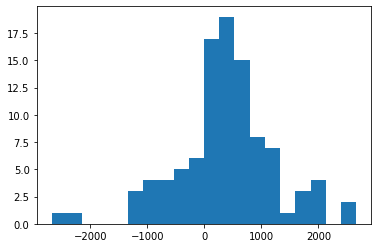

In [71]:
plt.hist(avg_list, bins=20)

In [53]:
pickle.dump(result, open("./output/4/sp500_train100000_test2000_repeat100_withsold_21JAN2020_ALL.out", "wb"))

In [68]:
result_df = pd.DataFrame(result)
result_df.to_csv("./output/4/sp500_train100000_test2000_repeat100_withsold_21JAN2020_ALL.csv")

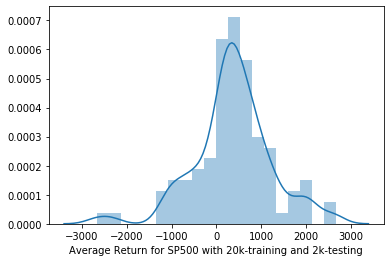

In [72]:
avg_series = pd.Series(avg_list, name="Average Return for SP500 with 20k-training and 2k-testing")
sns.distplot(avg_series, bins=20);

[]

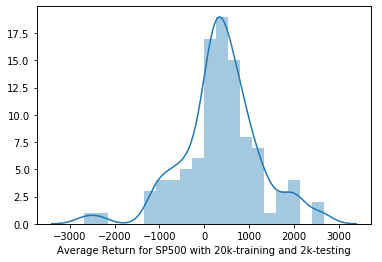

In [73]:
# Plotting hist without kde
ax = sns.distplot(avg_series, kde=False, bins=20)

# Creating another Y axis
second_ax = ax.twinx()

#Plotting kde without hist on the second Y axis
sns.distplot(avg_series, ax=second_ax, kde=True, hist=False, bins=20)

#Removing Y ticks from the second axis
second_ax.set_yticks([])

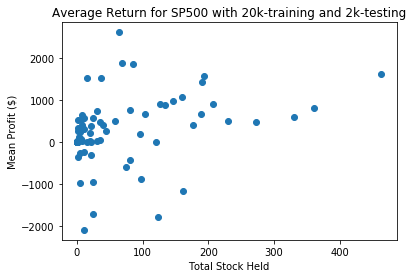

In [74]:
plt.scatter(result_df['total_shares_sold'], result_df['mean'])
plt.title("Average Return for SP500 with 20k-training and 2k-testing")
plt.xlabel("Total Stock Held")
plt.ylabel("Mean Profit ($)")
plt.show()